In [1]:
library(tidyverse) 

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
impute_by_mean <- function(x) { 
    mu <- mean(x,na.rm=TRUE) # first compute the mean of x 
    impute_f <- function(z) { # coordinate-wise imputation 
        if(is.na(z)) { 
            return(mu) # if z is na replace with mean 
        }else{ 
            return(z) # otherwise leave in place 
        } 
    } 
    return(map_dbl(x,impute_f)) # apply the map function to impute across vector 
} 


impute_by_median <- function(x) { 
    mu <- median(x,na.rm=TRUE)
    impute_f <- function(z) { 
        if(is.na(z)) { 
            return(mu) 
        }else{ 
            return(z) 
        } 
    } 
    return(map_dbl(x,impute_f))
} 

In [3]:
v<-c(1,2,NA,4) 
impute_by_median(v) 

[1] 1 2 2 4

In [4]:
x <- seq(0, 10, 0.1)
y <- 5 * x + 1
df_xy <- data.frame(x = x, y = y)
df_xy %>% head(5) 

,x,y
,<dbl>,<dbl>
1,0.0,1.0
2,0.1,1.5
3,0.2,2.0
4,0.3,2.5
5,0.4,3.0


In [5]:
df_xy %>% mutate(z=map2_dbl(x,y,~.x+.y)) %>% head(5) 

,x,y,z
,<dbl>,<dbl>,<dbl>
1,0.0,1.0,1.0
2,0.1,1.5,1.6
3,0.2,2.0,2.2
4,0.3,2.5,2.8
5,0.4,3.0,3.4


In [6]:
sometimes_missing <- function(index, value) {
    if (index%%5==0) {
        return (NA)
    } else {
        return (value)
    }
}


sometimes_missing(14,25) 
sometimes_missing(15,25) 

[1] 25

[1] NA

In [7]:
x <- seq(0, 10, 0.1)
y <- 5 * x + 1

df_xy_missing <- data.frame(x = x, y = y)%>% mutate( y = map2_dbl(row_number(), y, sometimes_missing) )

df_xy_missing %>% head(10) 

,x,y
,<dbl>,<dbl>
1,0.0,1.0
2,0.1,1.5
3,0.2,2.0
4,0.3,2.5
5,0.4,NA
6,0.5,3.5
7,0.6,4.0
8,0.7,4.5
9,0.8,5.0


In [8]:
x <- seq(0, 10, 0.1)
y <- 5 * x + 1

# df_xy_imputed <- data.frame(x = x, y = y) %>% 
#     mutate( y = map2_dbl(row_number(), y, sometimes_missing) ) %>%
#     mutate( y = map_dbl(y, impute_by_median) )  # <<<错误案例>>> impute函数循环的是一整个向量, 所以无需使用映射函数

df_xy_imputed <- data.frame(x = x, y = y) %>% 
    mutate( y = map2_dbl(row_number(), y, sometimes_missing) ) %>%
    mutate( y = impute_by_mean(y) )

df_xy_imputed

x,y
<dbl>,<dbl>
0.0,1.00000
0.1,1.50000
0.2,2.00000
0.3,2.50000
0.4,25.81481
0.5,3.50000
0.6,4.00000
0.7,4.50000
0.8,5.00000


In [9]:
library(readxl) # load the readxl library 
folder_path <- "./" 
file_name<-"HockeyLeague.xlsx" # set the file name 
file_path<-paste(folder_path,file_name,sep="") # create the file_path 
wins_data_frame<-read_excel(file_path,sheet="Wins") # read of a sheet from an xl file 
colnames(wins_data_frame)[1] <- "Team"

New names:
• `` -> `...1`


In [10]:
# wins_data_frame

In [11]:
wins_data_frame %>% select(1:5) %>% head(3)  # 前五列 + 前三行

Team,1990,1991,1992,1993
<chr>,<chr>,<chr>,<chr>,<chr>
Ducks,30 of 50,11 of 50,30 of 50,12 of 50
Eagles,24 of 50,12 of 50,37 of 50,14 of 50
Hawks,20 of 50,22 of 50,33 of 50,11 of 50


In [12]:
wins_tidy <- wins_data_frame %>% 
    pivot_longer(cols = !Team, names_to="Year", values_to="Wins") %>% 
    separate(Wins, into=c("Wins", "Total"), sep=" of ", convert = TRUE) %>%
    mutate(Year = as.integer(Year)) 

In [13]:
wins_tidy %>% dim()

[1] 248   4

In [14]:
wins_tidy%>%head(5)

Team,Year,Wins,Total
<chr>,<int>,<int>,<int>
Ducks,1990,30,50
Ducks,1991,11,50
Ducks,1992,30,50
Ducks,1993,12,50
Ducks,1994,24,50


In [15]:
losses_data_frame <- read_excel(file_path,sheet="Losses") # read of a sheet from an xl file 
colnames(losses_data_frame)[1] <- "Team"

New names:
• `` -> `...1`


In [16]:
losses_data_frame %>% select(1:5) %>% head(3)  # 前五列 + 前三行

Team,1990,1991,1992,1993
<chr>,<chr>,<chr>,<chr>,<chr>
Ducks,20 of 50,37 of 50,1 of 50,30 of 50
Eagles,9 of 50,34 of 50,3 of 50,12 of 50
Hawks,13 of 50,12 of 50,5 of 50,12 of 50


In [17]:
losses_tidy <- losses_data_frame %>% 
    pivot_longer(cols = !Team, names_to="Year", values_to="Wins") %>% 
    separate(Wins, into=c("Losses", "Total"), sep=" of ", convert = TRUE) %>%
    mutate(Year = as.integer(Year)) 

In [18]:
losses_tidy %>% head(5) 

Team,Year,Losses,Total
<chr>,<int>,<int>,<int>
Ducks,1990,20,50
Ducks,1991,37,50
Ducks,1992,1,50
Ducks,1993,30,50
Ducks,1994,7,50


In [19]:
hockey_df <- full_join(wins_tidy, losses_tidy) %>%
    mutate(Draws = Total - Wins - Losses) %>%
    mutate(Wins_rt = Wins / Total) %>%
    mutate(Losses_rt = Losses / Total) %>%
    mutate(Draws_rt = Draws / Total)

Joining with `by = join_by(Team, Year, Total)`


In [20]:
hockey_df

Team,Year,Wins,Total,Losses,Draws,Wins_rt,Losses_rt,Draws_rt
<chr>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
Ducks,1990,30,50,20,0,0.6000000,0.40000000,0.00000000
Ducks,1991,11,50,37,2,0.2200000,0.74000000,0.04000000
Ducks,1992,30,50,1,19,0.6000000,0.02000000,0.38000000
Ducks,1993,12,50,30,8,0.2400000,0.60000000,0.16000000
Ducks,1994,24,50,7,19,0.4800000,0.14000000,0.38000000
Ducks,1995,13,50,2,35,0.2600000,0.04000000,0.70000000
Ducks,1996,25,50,20,5,0.5000000,0.40000000,0.10000000
Ducks,1997,24,50,9,17,0.4800000,0.18000000,0.34000000
Ducks,1998,27,50,17,6,0.5400000,0.34000000,0.12000000


In [21]:
team_statistics <- hockey_df %>%
    select(Team, Wins_rt, Losses_rt, Draws_rt) %>%  
    group_by(Team) %>%
    summarise(
        W_md = median(Wins_rt, na.rm = TRUE),
        W_mn = mean(Wins_rt, na.rm = TRUE),
        L_md = median(Losses_rt, na.rm = TRUE),
        L_mn = mean(Losses_rt, na.rm = TRUE),
        D_md = median(Draws_rt, na.rm = TRUE),
        D_mn = mean(Draws_rt, na.rm = TRUE),
    ) %>%
    arrange(desc(W_md))

In [22]:
team_statistics

Team,W_md,W_mn,L_md,L_mn,D_md,D_mn
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Eagles,0.4500000,0.4366667,0.2500000,0.2794624,0.3166667,0.2838710
Penguins,0.4500000,0.4572043,0.3000000,0.3103226,0.1333333,0.2324731
Hawks,0.4166667,0.3876344,0.2333333,0.2461290,0.3200000,0.3662366
Ducks,0.3833333,0.3619355,0.3400000,0.3332258,0.2500000,0.3048387
Owls,0.3200000,0.3327957,0.3000000,0.3300000,0.3833333,0.3372043
Ostriches,0.3000000,0.3094624,0.4000000,0.3945161,0.2666667,0.2960215
Storks,0.3000000,0.2838710,0.2200000,0.2834409,0.4800000,0.4326882
Kingfishers,0.2333333,0.2454839,0.3400000,0.3595699,0.4000000,0.3949462


In [23]:
num_red_balls <- 3
num_blue_balls <- 7
total_draws <- 22

prob_red_spheres <- function(z) {
    total_balls <- num_red_balls + num_blue_balls
    log_prob <- log(choose(total_draws, z)) +
        z * log(num_red_balls / total_balls) +
        (total_draws - z) * log(num_blue_balls / total_balls)
    return(exp(log_prob))
}

num_trials <- 1000  
set.seed(0) 

num_reds_in_simulation <- data.frame(trial = 1:num_trials) %>%
  mutate(sample_balls = map(.x = trial, function(x) { sample(10, 22, replace = TRUE) })) %>%
  mutate(num_reds = map_dbl(.x = sample_balls, function(.x) sum(.x == 3))) %>%
  pull(num_reds)

prob_by_num_reds <- data.frame(num_reds = seq(22)) %>%
  mutate(TheoreticalProbability = prob_red_spheres(num_reds)) %>%
  mutate(EstimatedProbability = map_dbl(.x = num_reds, function(.x) sum(num_reds_in_simulation == .x) / num_trials))

print(prob_by_num_reds)

   num_reds TheoreticalProbability EstimatedProbability
1         1           3.686403e-03                0.259
2         2           1.658881e-02                0.296
3         3           4.739661e-02                0.184
4         4           9.648595e-02                0.111
5         5           1.488640e-01                0.035
6         6           1.807635e-01                0.021
7         7           1.770744e-01                0.003
8         8           1.422919e-01                0.000
9         9           9.486130e-02                0.000
10       10           5.285129e-02                0.000
11       11           2.470970e-02                0.000
12       12           9.707380e-03                0.000
13       13           3.200235e-03                0.000
14       14           8.816975e-04                0.000
15       15           2.015309e-04                0.000
16       16           3.778704e-05                0.000
17       17           5.715686e-06              

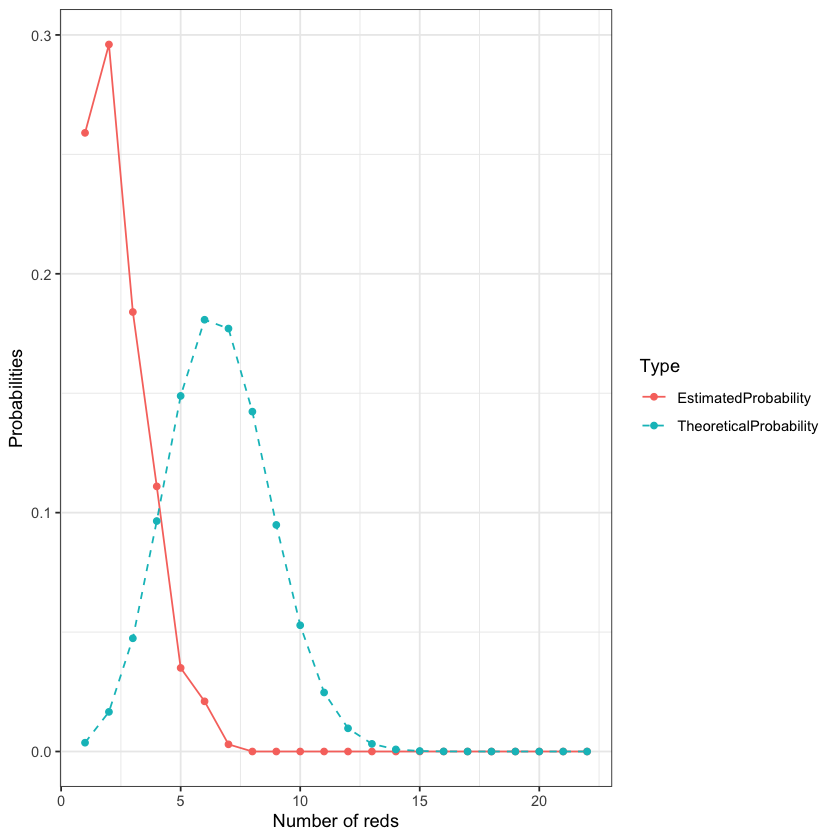

In [24]:
prob_by_num_reds %>% 
    pivot_longer(cols=c("EstimatedProbability","TheoreticalProbability"), names_to="Type",values_to="count") %>% 
    ggplot(aes(num_reds,count)) +  
    geom_line(aes(linetype=Type, color=Type)) + 
geom_point(aes(color=Type)) + 
    scale_linetype_manual(values = c("solid", "dashed"))+ 
    theme_bw() + xlab("Number of reds") + ylab("Probabilities") 